In [4]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [5]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [6]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [7]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [8]:
INSTITUTION_ID = "ins_109508"

In [9]:
# YOUR CODE HERE

### 2. Generate a public token

In [10]:
# YOUR CODE HERE
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

#/class/05-APIs/2/Activities/06-Stu_Sporting_Plaid_Pt_2/Solved/sporting_plaid.ipynb

### 3. Exchange the public token for an access token

In [11]:
# YOUR CODE HERE
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

#/class/05-APIs/2/Activities/06-Stu_Sporting_Plaid_Pt_2/Solved/sporting_plaid.ipynb

### 4. Fetch Accounts

In [12]:
# YOUR CODE HERE
# Get accounts associated with institution
client.Accounts.get(access_token)

#class/05-APIs/2/Activities/04-Ins_Plaid_Demo/Solved/plaid_demo.ipynb

{'accounts': [{'account_id': 'RgZnE5NZv5I5Q9KxrpGgsZbdxlNp5MuRvBEPJ',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '6WLDV8ZLj8U3BWbx8lyNHqknG5WLb3ugoy51m',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'XnQJm5ZQv5Flb9Arm8KyF3LQbW8e65HdW3a1D',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [42]:
# YOUR CODE HERE

# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-120))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
#print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

### 2. Print the categories for each transaction

In [43]:
# YOUR CODE HERE
#pretty_print_response(transaction_response)

print(json.dumps(transaction_response, indent=4, sort_keys=True))

#class/05-APIs/2/Activities/04-Ins_Plaid_Demo/Solved/plaid_demo.ipynb

#transaction data: date, name, amount, category. 

{
    "accounts": [
        {
            "account_id": "RgZnE5NZv5I5Q9KxrpGgsZbdxlNp5MuRvBEPJ",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "6WLDV8ZLj8U3BWbx8lyNHqknG5WLb3ugoy51m",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [44]:
# YOUR CODE HERE
df = pd.io.json.json_normalize(transaction_response['transactions'])
df_index = df[['date', 'name','amount','category']]
#
df_index.head()

,date,name,amount,category
0,2019-09-03,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
1,2019-09-01,Uber 072515 SF**POOL**,6.33,"[Travel, Car Service, Ride Share]"
2,2019-08-29,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
4,2019-08-28,KFC,500.00,"[Food and Drink, Restaurants]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [45]:
# YOUR CODE HERE
df_rev1 = df_index
df_rev1['category'] = df_rev1['category'].astype(str)
df_rev1['amount'] = df_rev1['amount'].astype(float)
df_rev1['date'] = pd.to_datetime(df_rev1['date'], errors='coerce')
df_rev1['category'] = df_rev1['category'].str.replace(r'[','')
df_rev1['category'] = df_rev1['category'].str.replace(r']','')
#df_rev1.head()
df_rev1['category'] = df_rev1['category'].str.split(',').str[0]
df_rev1.head()

C:\Users\rolop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rolop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rolop\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,date,name,amount,category
0,2019-09-03,United Airlines,500.00,'Travel'
1,2019-09-01,Uber 072515 SF**POOL**,6.33,'Travel'
2,2019-08-29,Tectra Inc,500.00,'Food and Drink'
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,'Payment'
4,2019-08-28,KFC,500.00,'Food and Drink'


In [46]:
df_rev1['category'] = df_rev1['category'].str.replace(r"'","")

df_rev1.head()

C:\Users\rolop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,name,amount,category
0,2019-09-03,United Airlines,500.00,Travel
1,2019-09-01,Uber 072515 SF**POOL**,6.33,Travel
2,2019-08-29,Tectra Inc,500.00,Food and Drink
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2019-08-28,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [47]:
# YOUR CODE HERE

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [48]:
df_rev2 = df_rev1[['category','amount']]
df_rev2.head()

,category,amount
0,Travel,500.00
1,Travel,6.33
2,Food and Drink,500.00
3,Payment,2078.50
4,Food and Drink,500.00


In [49]:
df_rev3 = df_rev2.groupby('category').sum()
df_rev3

,amount
category,
Food and Drink,4422.92
Payment,8414.00
Recreation,314.00
Shops,2000.00
Transfer,27383.12
Travel,546.92


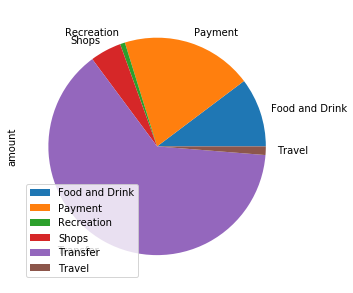

In [50]:
# YOUR CODE HERE
df_rev3.plot.pie(y='amount', figsize=(5, 5))

### Calculate the expenses per month

In [51]:
df_rev4 = df_rev1[['date','amount']]
df_rev4 = df_rev4.set_index('date')
df_rev4.head()

,amount
date,
2019-09-03,500.00
2019-09-01,6.33
2019-08-29,500.00
2019-08-28,2078.50
2019-08-28,500.00


In [52]:
df_rev5 = df_rev4.groupby([df_rev4.index.year,df_rev4.index.month]).sum()
df_rev5 = df_rev5.drop(df_rev5.index[0])
df_rev5.head()

amount
date date          
2019 6     10645.24
     7     10645.24
     8     10645.24
     9       506.33

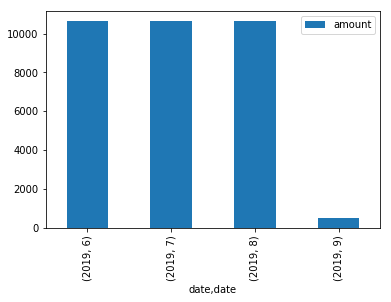

In [53]:
# YOUR CODE HERE
df_rev5.plot.bar()